# Titanic disaster prediction

## Importing the Libraries

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [289]:
# Reading the data sets

In [201]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [202]:
combine = [train,test]

In [203]:
# need to check shape description
# data distribution 
# how many categorical amd numerical columns
#null values
# outliers
# feature engineering
# train the model 
# predict the test


In [204]:
print(train.shape , test.shape)

(891, 12) (418, 11)


In [205]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [206]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

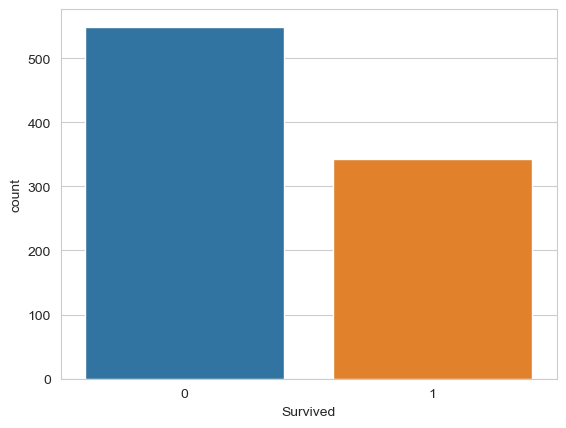

In [208]:
sns.set_style('whitegrid')
sns.countplot(train['Survived']);

<AxesSubplot:xlabel='Survived', ylabel='count'>

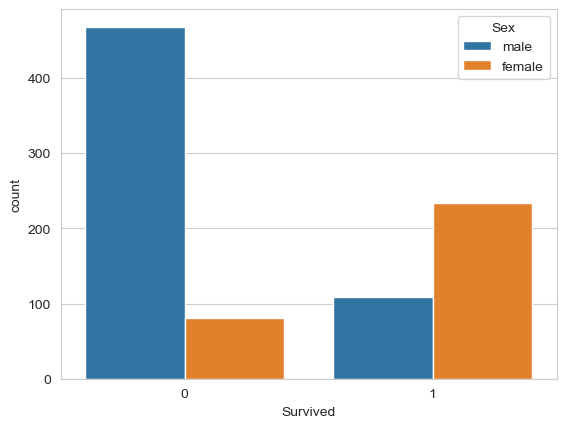

In [209]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data= train)

In [210]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

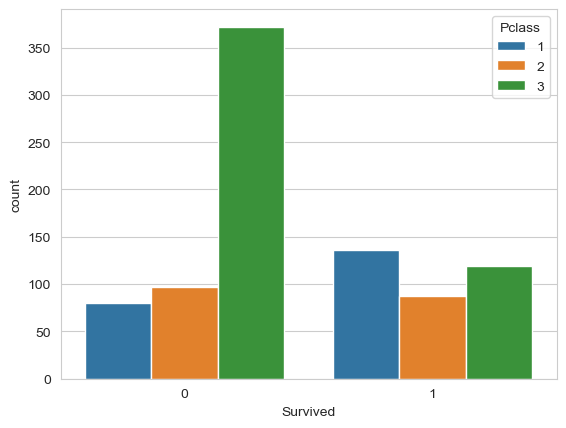

In [211]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data= train)

<AxesSubplot:xlabel='Age'>

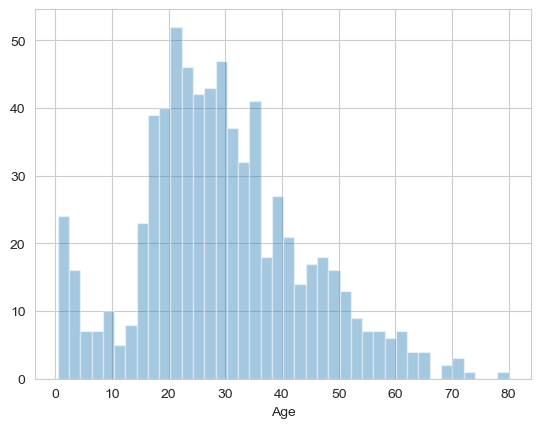

In [212]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<AxesSubplot:>

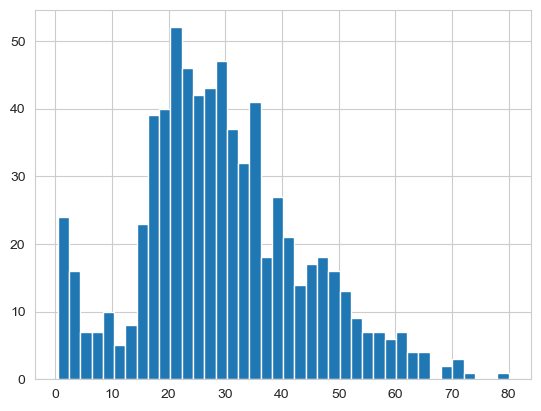

In [213]:
train['Age'].hist(bins=40)

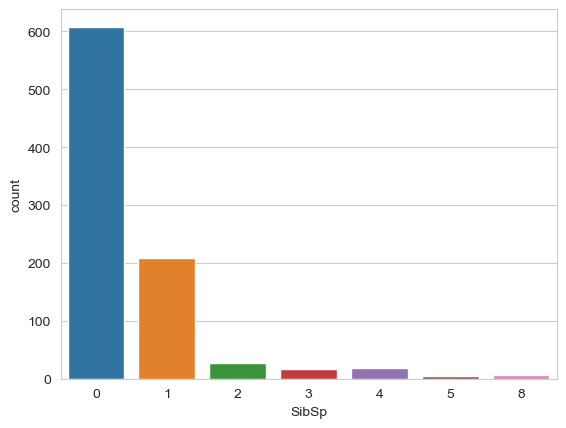

In [214]:
sns.countplot(train['SibSp']);

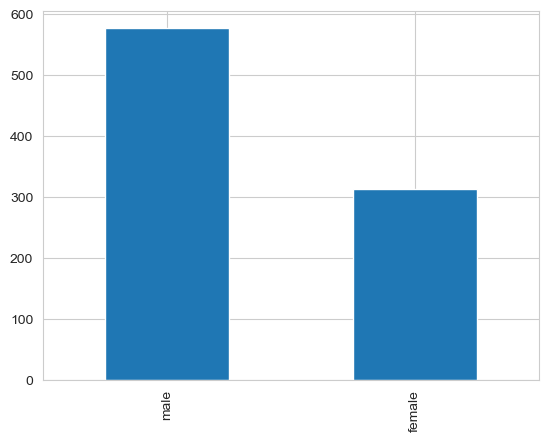

In [215]:
train['Sex'].value_counts().plot(kind='bar');


In [216]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

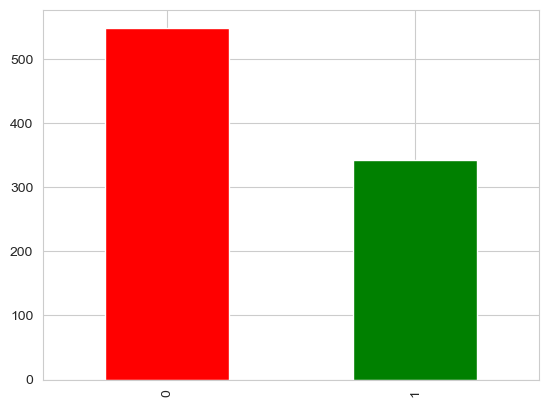

In [217]:
train.Survived.value_counts().plot(kind='bar',color=['r','g']);

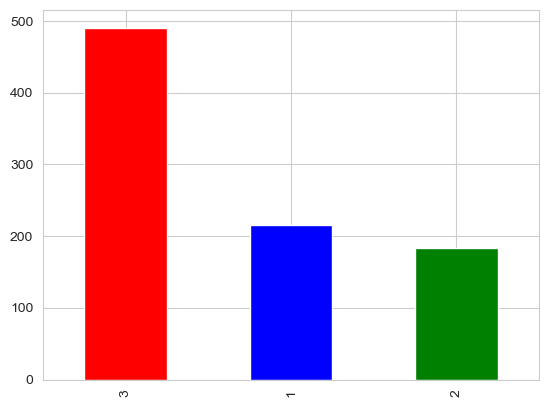

In [218]:
train['Pclass'].value_counts().plot(kind='bar',color=['r','b','g']);

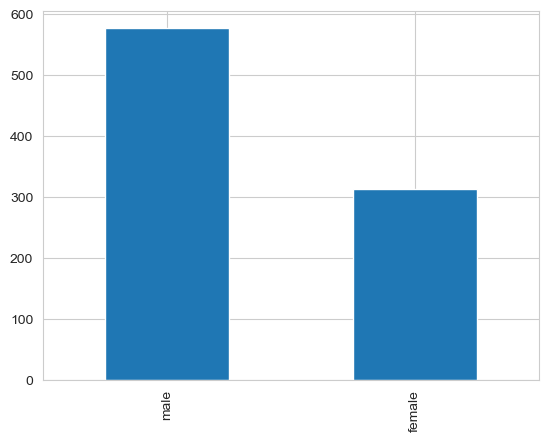

In [219]:
train['Sex'].value_counts().plot(kind='bar');

In [220]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

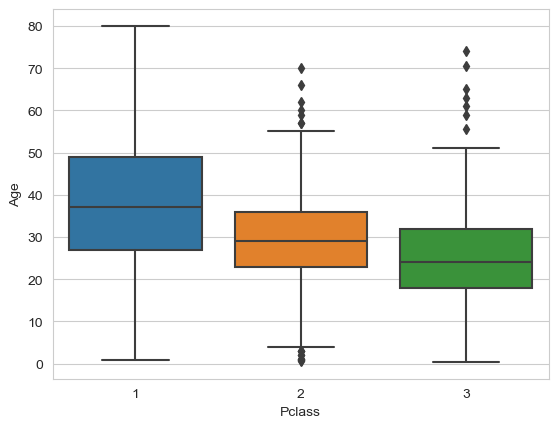

In [222]:
sns.boxplot(train['Pclass'],train['Age'])

In [291]:
# implementing the null values with age_impute withrespect Pclass

In [223]:
def age_impute(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
        
    else:
        return Age
        

In [224]:
train['Age'] = train[['Age','Pclass']].apply(age_impute,axis=1)

In [225]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
# removing cabin columns as it contain lot of null values
train = train.drop('Cabin',axis=1)

In [227]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [228]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [229]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [230]:
train.dropna(inplace=True)

In [231]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [232]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [233]:
# creating a copy of the cleaned data set
df = train.copy()

In [234]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Feature Engineering

In [235]:
# Binning Age column
df['Age_binned'] = pd.cut(df['Age'], bins=[0, 18, 30, 60, 100], labels=['Child', 'Young', 'Middle-aged', 'Elderly'])

# One-hot encoding Sex column
df = pd.get_dummies(df, columns=['Sex'],drop_first=True)

# Scaling Fare column
df['Fare_scaled'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

# Combining Parch and SibSp columns
df['Family_Size'] = df['Parch'] + df['SibSp'] + 1

# Drop columns that are no longer needed
df = df.drop(['Name', 'Ticket','Age', 'Parch', 'SibSp','Fare'], axis=1)

# Display the first few rows of the modified data set
print(df.head())

   PassengerId  Survived  Pclass Embarked   Age_binned  Sex_male  Fare_scaled  \
0            1         0       3        S        Young         1    -0.499958   
1            2         1       1        C  Middle-aged         0     0.788503   
2            3         1       3        S        Young         0    -0.486376   
3            4         1       1        S  Middle-aged         0     0.422623   
4            5         0       3        S  Middle-aged         1    -0.483861   

   Family_Size  
0            2  
1            2  
2            1  
3            2  
4            1  


In [236]:
df.head()

,PassengerId,Survived,Pclass,Embarked,Age_binned,Sex_male,Fare_scaled,Family_Size
0,1,0,3,S,Young,1,-0.499958,2
1,2,1,1,C,Middle-aged,0,0.788503,2
2,3,1,3,S,Young,0,-0.486376,1
3,4,1,1,S,Middle-aged,0,0.422623,2
4,5,0,3,S,Middle-aged,1,-0.483861,1


In [237]:
df['Age_binned']  = df['Age_binned'].astype('object')

In [238]:
cat_var = df.select_dtypes(include='object')
cat_var

,Embarked,Age_binned
0,S,Young
1,C,Middle-aged
2,S,Young
3,S,Middle-aged
4,S,Middle-aged
...,...,...
886,S,Young
887,S,Young
888,S,Young
889,C,Young


In [239]:
cat_encoded = pd.get_dummies(cat_var,drop_first=True)
cat_encoded

,Embarked_Q,Embarked_S,Age_binned_Elderly,Age_binned_Middle-aged,Age_binned_Young
0,0,1,0,0,1
1,0,0,0,1,0
2,0,1,0,0,1
3,0,1,0,1,0
4,0,1,0,1,0
...,...,...,...,...,...
886,0,1,0,0,1
887,0,1,0,0,1
888,0,1,0,0,1
889,0,0,0,0,1


In [240]:
num_var = df.select_dtypes(include=np.number)
num_var

,PassengerId,Survived,Pclass,Sex_male,Fare_scaled,Family_Size
0,1,0,3,1,-0.499958,2
1,2,1,1,0,0.788503,2
2,3,1,3,0,-0.486376,1
3,4,1,1,0,0.422623,2
4,5,0,3,1,-0.483861,1
...,...,...,...,...,...,...
886,887,0,2,1,-0.384258,1
887,888,1,1,0,-0.042189,1
888,889,0,3,0,-0.173986,4
889,890,1,1,1,-0.042189,1


In [241]:
X = pd.concat([num_var,cat_encoded],axis=1)
X.head()

,PassengerId,Survived,Pclass,Sex_male,Fare_scaled,Family_Size,Embarked_Q,Embarked_S,Age_binned_Elderly,Age_binned_Middle-aged,Age_binned_Young
0,1,0,3,1,-0.499958,2,0,1,0,0,1
1,2,1,1,0,0.788503,2,0,0,0,1,0
2,3,1,3,0,-0.486376,1,0,1,0,0,1
3,4,1,1,0,0.422623,2,0,1,0,1,0
4,5,0,3,1,-0.483861,1,0,1,0,1,0


## Model Building

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [277]:

# Split the data into training and testing sets
x = X.drop(['Survived','PassengerId'], axis=1)
y = X['Survived']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [278]:
X_train.head()

,Pclass,Sex_male,Fare_scaled,Family_Size,Embarked_Q,Embarked_S,Age_binned_Elderly,Age_binned_Middle-aged,Age_binned_Young
364,3,1,-0.333954,2,1,0,0,0,1
256,1,0,0.947800,1,0,0,0,1,0
477,3,1,-0.504067,2,0,1,0,0,1
272,2,0,-0.253467,2,0,1,0,1,0
554,3,0,-0.489394,1,0,1,0,0,1


In [279]:
# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [280]:
# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [281]:
# Train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [282]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [283]:
# Evaluate the models on the test set
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [284]:
# Calculate the accuracy of each model
lr_acc = accuracy_score(y_test, lr_pred)
knn_acc = accuracy_score(y_test, knn_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)


In [285]:
# Print the accuracy of each model
print("Logistic Regression accuracy: ", lr_acc)
print("K-Nearest Neighbors accuracy: ", knn_acc)
print("Decision Tree accuracy: ", dt_acc)
print("Random Forest accuracy: ", rf_acc)

Logistic Regression accuracy:  0.7247191011235955
K-Nearest Neighbors accuracy:  0.7359550561797753
Decision Tree accuracy:  0.7696629213483146
Random Forest accuracy:  0.7921348314606742


In [252]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [253]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [254]:
test['Age'] = test[['Age','Pclass']].apply(age_impute,axis=1)

In [255]:
test = test.drop('Cabin',axis=1)

In [256]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [257]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [258]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [259]:
test.shape

(418, 10)

In [260]:
df1 = test.copy()

In [261]:
# Binning Age column
df1['Age_binned'] = pd.cut(df1['Age'], bins=[0, 18, 30, 60, 100], labels=['Child', 'Young', 'Middle-aged', 'Elderly'])

# One-hot encoding Sex column
df1 = pd.get_dummies(df1, columns=['Sex'],drop_first=True)

# Scaling Fare column
df1['Fare_scaled'] = (df1['Fare'] - df1['Fare'].mean()) / df1['Fare'].std()

# Combining Parch and SibSp columns
df1['Family_Size'] = df1['Parch'] + df1['SibSp'] + 1

# Drop columns that are no longer needed
df1 = df1.drop(['Name', 'Ticket','Age', 'Parch', 'SibSp','Fare'], axis=1)

# Display the first few rows of the modified data set
print(df1.head())

   PassengerId  Pclass Embarked   Age_binned  Sex_male  Fare_scaled  \
0          892       3        Q  Middle-aged         1    -0.497811   
1          893       3        S  Middle-aged         0    -0.512660   
2          894       2        Q      Elderly         1    -0.464532   
3          895       3        S        Young         1    -0.482888   
4          896       3        S        Young         0    -0.417971   

   Family_Size  
0            1  
1            2  
2            1  
3            1  
4            3  


In [262]:
df1.head()

,PassengerId,Pclass,Embarked,Age_binned,Sex_male,Fare_scaled,Family_Size
0,892,3,Q,Middle-aged,1,-0.497811,1
1,893,3,S,Middle-aged,0,-0.512660,2
2,894,2,Q,Elderly,1,-0.464532,1
3,895,3,S,Young,1,-0.482888,1
4,896,3,S,Young,0,-0.417971,3


In [263]:
df1['Age_binned']  = df1['Age_binned'].astype('object')

In [264]:
cat_test = df1.select_dtypes(include='object')
cat_test.head()

,Embarked,Age_binned
0,Q,Middle-aged
1,S,Middle-aged
2,Q,Elderly
3,S,Young
4,S,Young


In [265]:
cat_test_encoded = pd.get_dummies(cat_test,drop_first=True)
cat_test_encoded.head()

,Embarked_Q,Embarked_S,Age_binned_Elderly,Age_binned_Middle-aged,Age_binned_Young
0,1,0,0,1,0
1,0,1,0,1,0
2,1,0,1,0,0
3,0,1,0,0,1
4,0,1,0,0,1


In [266]:
num_test = df1.select_dtypes(include=np.number)
num_test

,PassengerId,Pclass,Sex_male,Fare_scaled,Family_Size
0,892,3,1,-0.497811,1
1,893,3,0,-0.512660,2
2,894,2,1,-0.464532,1
3,895,3,1,-0.482888,1
4,896,3,0,-0.417971,3
...,...,...,...,...,...
413,1305,3,1,-0.493856,1
414,1306,1,0,1.312180,1
415,1307,3,1,-0.508183,1
416,1308,3,1,-0.493856,1


In [267]:
X_t = pd.concat([num_test,cat_test_encoded],axis=1)


In [268]:
X_t.head()

,PassengerId,Pclass,Sex_male,Fare_scaled,Family_Size,Embarked_Q,Embarked_S,Age_binned_Elderly,Age_binned_Middle-aged,Age_binned_Young
0,892,3,1,-0.497811,1,1,0,0,1,0
1,893,3,0,-0.512660,2,0,1,0,1,0
2,894,2,1,-0.464532,1,1,0,1,0,0
3,895,3,1,-0.482888,1,0,1,0,0,1
4,896,3,0,-0.417971,3,0,1,0,0,1


In [269]:
X_t.shape

(418, 10)

In [270]:
X_test = X_t.drop("PassengerId", axis=1)

In [288]:
# Make predictions for the test data
y_pred_test = rf.predict(X_test)

In [272]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [273]:
# Prepare the submission file
submission = pd.DataFrame({
    "PassengerId": X_t["PassengerId"],
    "Survived": y_pred_test
})

# Save the submission file
submission.to_csv("submission.csv", index=False)

In [275]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score